<a href="https://colab.research.google.com/github/momen6390/momen/blob/main/Demo_Quant_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Download historical price data

In [2]:
# Set the time frame
start_date = '2025-05-13'
end_date = '2025-05-21'

In [3]:
data = yf.download(['BTC-USD', 'ETH-USD'], start=start_date, end=end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed


# Step 2: Calculate daily returns

In [4]:
# Print the raw data to confirm structure
print("Raw Data:")
print(data.head())

Raw Data:
Price               Close                        High               \
Ticker            BTC-USD      ETH-USD        BTC-USD      ETH-USD   
Date                                                                 
2025-05-13  104169.812500  2680.129639  104997.421875  2736.890137   
2025-05-14  103539.414062  2610.063232  104303.562500  2721.949951   
2025-05-15  103744.640625  2546.856934  104153.617188  2645.074219   
2025-05-16  103489.289062  2536.297607  104533.484375  2645.607910   
2025-05-17  103191.085938  2475.754395  103716.945312  2537.781738   

Price                 Low                        Open               \
Ticker            BTC-USD      ETH-USD        BTC-USD      ETH-USD   
Date                                                                 
2025-05-13  101515.093750  2418.325684  102812.492188  2496.337402   
2025-05-14  102618.296875  2549.685059  104167.328125  2680.262207   
2025-05-15  101440.812500  2482.212891  103538.828125  2610.027832   
2025-05-1

Safely access 'Close' prices

In [5]:
if 'Close' in data.columns:
    close = data['Close']
else:
    close = data.xs('Close', axis=1, level=0)  # For multi-index fallback

print("\nClose Prices:")
print(close)


Close Prices:
Ticker            BTC-USD      ETH-USD
Date                                  
2025-05-13  104169.812500  2680.129639
2025-05-14  103539.414062  2610.063232
2025-05-15  103744.640625  2546.856934
2025-05-16  103489.289062  2536.297607
2025-05-17  103191.085938  2475.754395
2025-05-18  106446.007812  2498.233643
2025-05-19  105606.179688  2529.166748
2025-05-20  106791.085938  2524.173096


# Print results

In [ ]:
print("\nClose Prices:")
print(close)


Close Prices:
Ticker            BTC-USD      ETH-USD
Date                                  
2025-05-13  104169.812500  2680.129639
2025-05-14  103539.414062  2610.063232
2025-05-15  103744.640625  2546.856934
2025-05-16  103489.289062  2536.297607
2025-05-17  103191.085938  2475.754395
2025-05-18  106446.007812  2498.233643
2025-05-19  105606.179688  2529.166748
2025-05-20  106791.085938  2524.173096


Calculate daily returns

In [6]:
returns = close.pct_change().dropna()
print("\nDaily Returns:")
print(returns)


Daily Returns:
Ticker       BTC-USD   ETH-USD
Date                          
2025-05-14 -0.006052 -0.026143
2025-05-15  0.001982 -0.024216
2025-05-16 -0.002461 -0.004146
2025-05-17 -0.002881 -0.023871
2025-05-18  0.031543  0.009080
2025-05-19 -0.007890  0.012382
2025-05-20  0.011220 -0.001974


# Calculate daily risk (standard deviation)

In [ ]:
if not returns.empty:
    daily_risk = returns.std()
    print("\nDaily Risk (Volatility):")
    print(daily_risk)
else:
    print("\nNot enough data to calculate returns or risk.")


Daily Risk (Volatility):
Ticker
BTC-USD    0.013817
ETH-USD    0.016336
dtype: float64


In [ ]:
pip install yfinance matplotlib pandas


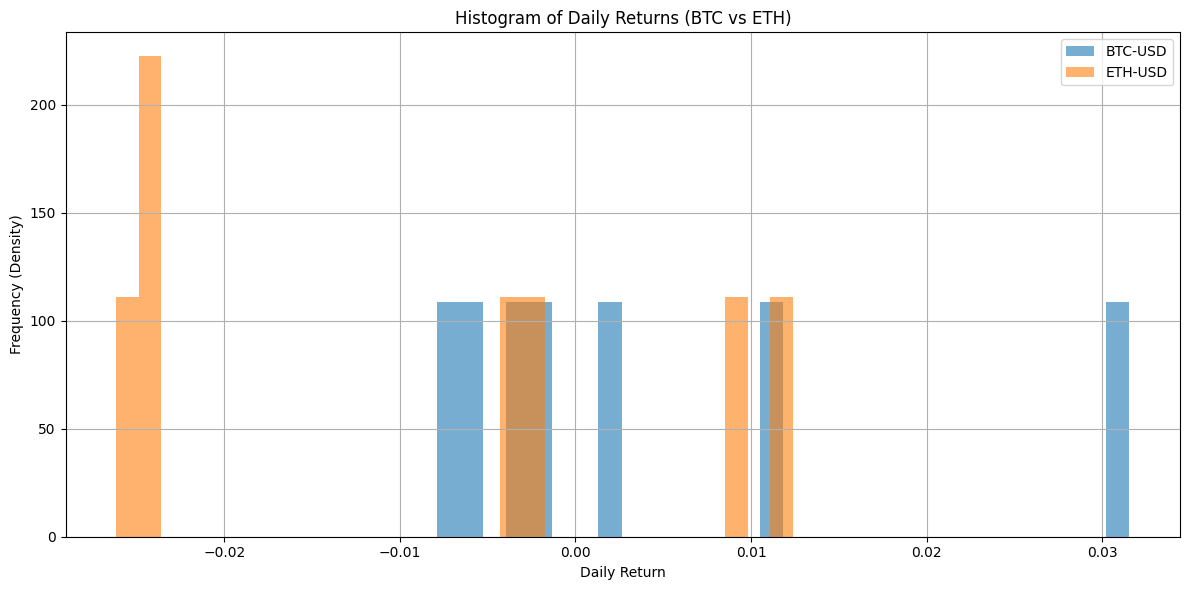

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(returns['BTC-USD'], bins=30, alpha=0.6, label='BTC-USD', density=True)
plt.hist(returns['ETH-USD'], bins=30, alpha=0.6, label='ETH-USD', density=True)
plt.title('Histogram of Daily Returns (BTC vs ETH)')
plt.xlabel('Daily Return')
plt.ylabel('Frequency (Density)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import norm

In [ ]:
import numpy as np

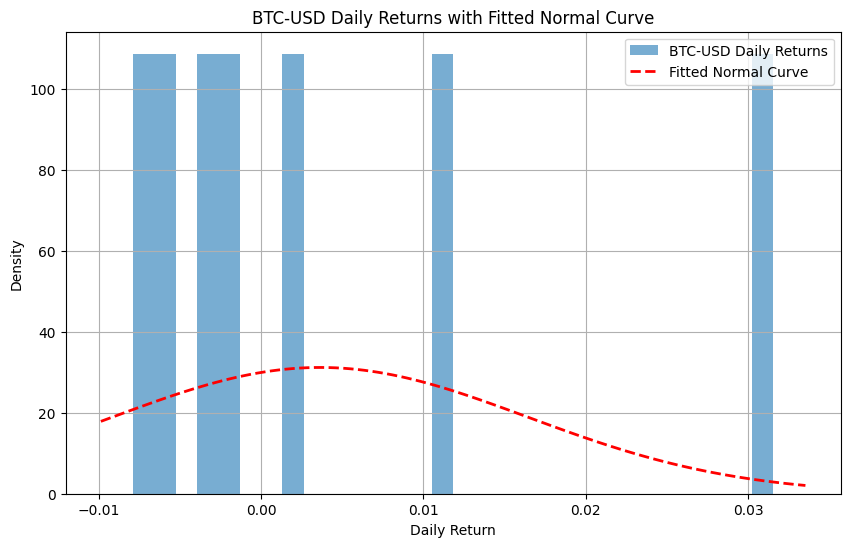

In [ ]:
# Step 2: Select one asset (e.g., BTC)
asset = 'BTC-USD'
asset_returns = returns[asset]

# Step 3: Fit normal distribution
mu, std = norm.fit(asset_returns)

# Step 4: Plot histogram + fitted curve
plt.figure(figsize=(10, 6))
plt.hist(asset_returns, bins=30, density=True, alpha=0.6, label=f'{asset} Daily Returns')

# Plot fitted normal PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = norm.pdf(x, mu, std)
plt.plot(x, pdf, 'r--', linewidth=2, label='Fitted Normal Curve')

# Labels
plt.title(f'{asset} Daily Returns with Fitted Normal Curve')
plt.xlabel('Daily Return')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

[*********************100%***********************]  2 of 2 completed


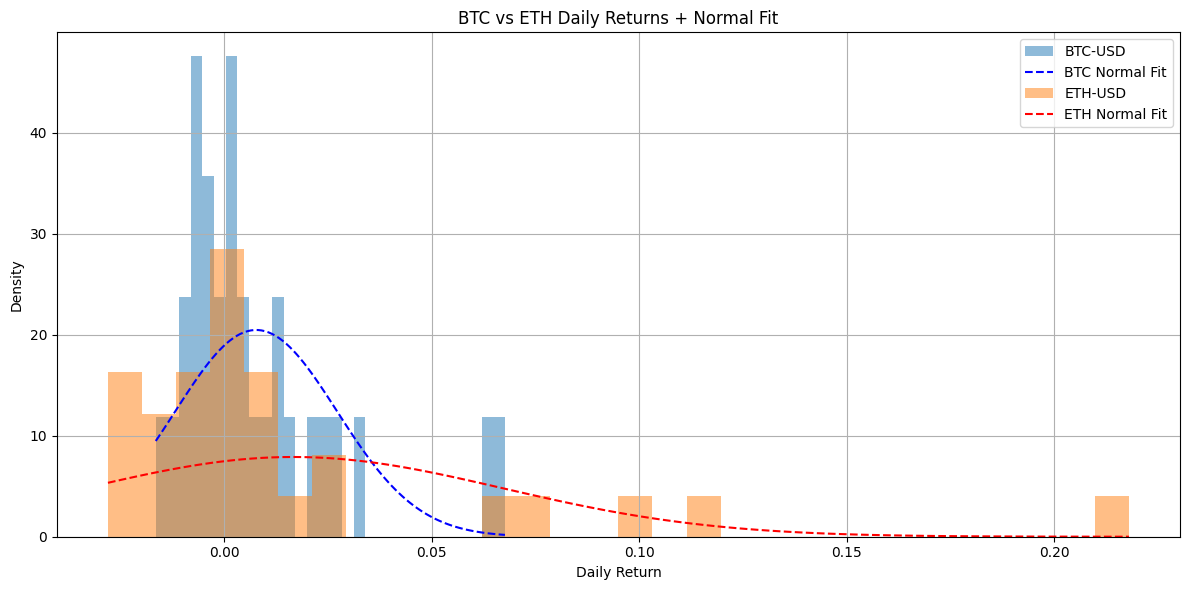

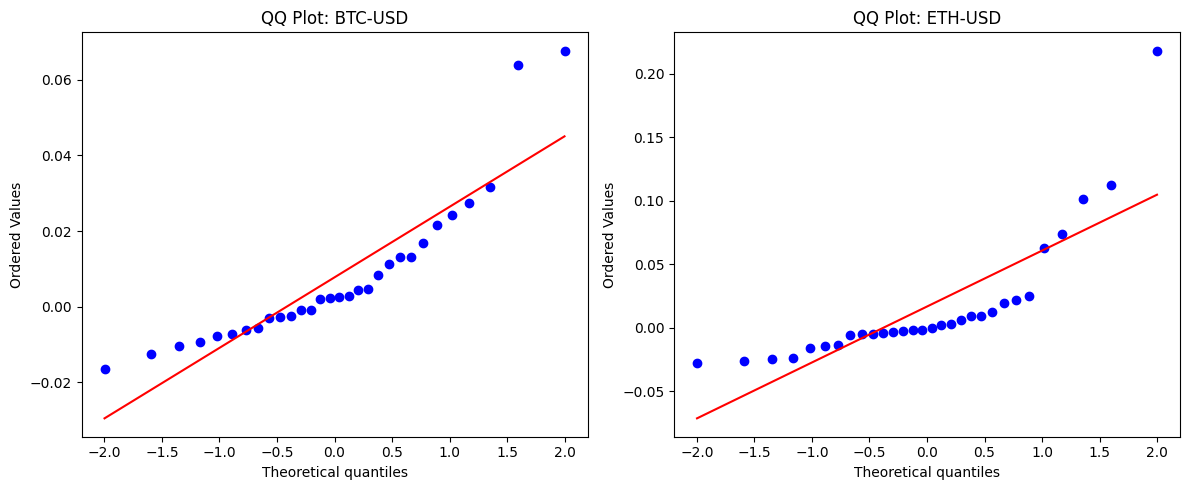


📊 Portfolio Summary (50% BTC, 50% ETH):
Mean Daily Return: 0.01225
Daily Risk (Volatility): 0.03367


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, probplot

# 1. Download BTC and ETH price data
data = yf.download(['BTC-USD', 'ETH-USD'], start='2025-04-20', end='2025-05-21')
returns = data['Close'].pct_change().dropna()

# 2. Fit normal distribution to each
mu_btc, std_btc = norm.fit(returns['BTC-USD'])
mu_eth, std_eth = norm.fit(returns['ETH-USD'])

# 3. Overlay histograms + normal PDFs
plt.figure(figsize=(12, 6))
x_btc = np.linspace(returns['BTC-USD'].min(), returns['BTC-USD'].max(), 100)
x_eth = np.linspace(returns['ETH-USD'].min(), returns['ETH-USD'].max(), 100)

plt.hist(returns['BTC-USD'], bins=30, alpha=0.5, density=True, label='BTC-USD')
plt.plot(x_btc, norm.pdf(x_btc, mu_btc, std_btc), 'b--', label='BTC Normal Fit')

plt.hist(returns['ETH-USD'], bins=30, alpha=0.5, density=True, label='ETH-USD')
plt.plot(x_eth, norm.pdf(x_eth, mu_eth, std_eth), 'r--', label='ETH Normal Fit')

plt.title('BTC vs ETH Daily Returns + Normal Fit')
plt.xlabel('Daily Return')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. QQ Plots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
probplot(returns['BTC-USD'], dist="norm", plot=axs[0])
axs[0].set_title("QQ Plot: BTC-USD")
probplot(returns['ETH-USD'], dist="norm", plot=axs[1])
axs[1].set_title("QQ Plot: ETH-USD")
plt.tight_layout()
plt.show()

# 5. Simulate 2-asset Portfolio (50/50 BTC-ETH)
weights = np.array([0.5, 0.5])
portfolio_return = returns.dot(weights)
portfolio_mean = portfolio_return.mean()
portfolio_std = portfolio_return.std()

print("\n📊 Portfolio Summary (50% BTC, 50% ETH):")
print(f"Mean Daily Return: {portfolio_mean:.5f}")
print(f"Daily Risk (Volatility): {portfolio_std:.5f}")


In [ ]:
pip install yfinance pandas numpy matplotlib


[*********************100%***********************]  2 of 2 completed


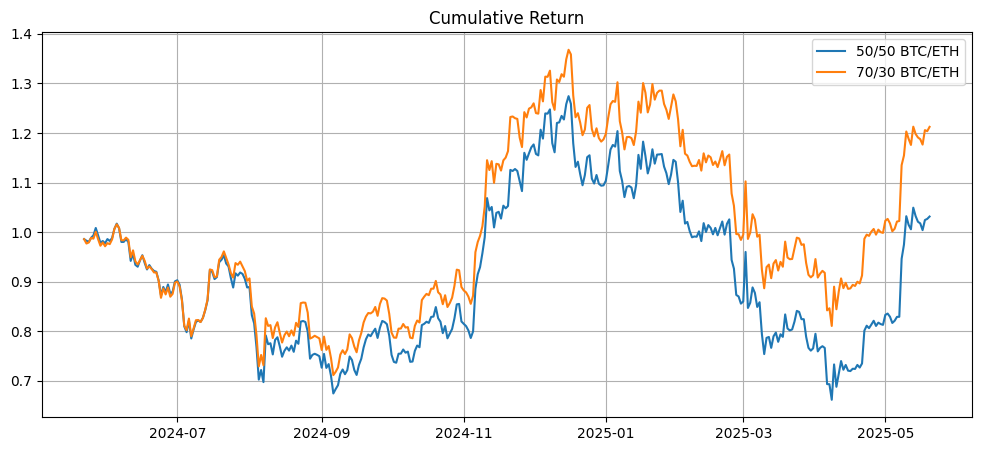

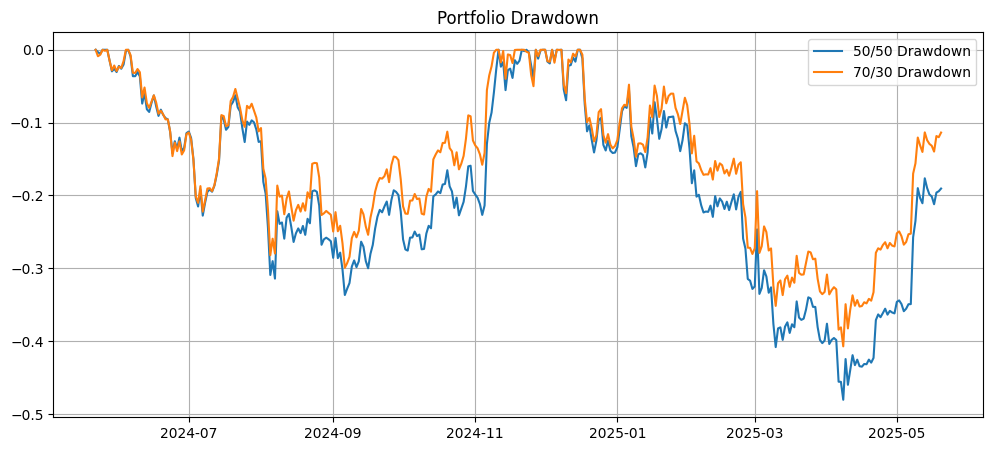

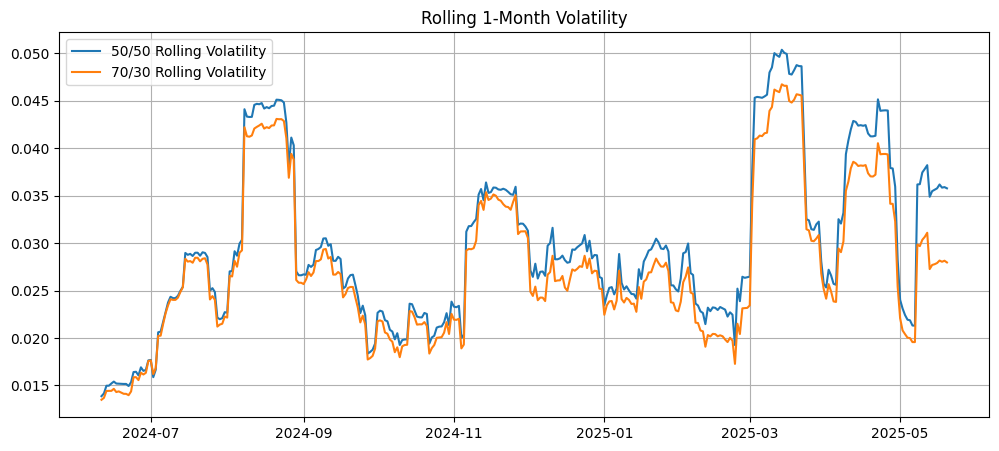

                 Mean Daily Return  Daily Volatility  Sharpe Ratio  \
50/50 BTC-ETH 0           0.000543          0.030439      0.017840   
70/30 BTC-ETH 0           0.000922          0.028186      0.032705   

                 Max Drawdown  
50/50 BTC-ETH 0     -0.480532  
70/30 BTC-ETH 0     -0.407186  


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download 1 year of BTC and ETH data
data = yf.download(['BTC-USD', 'ETH-USD'], start='2024-05-21', end='2025-05-21')
close = data['Close']
returns = close.pct_change().dropna()

# Weights for portfolio
weights_50_50 = np.array([0.5, 0.5])
weights_70_30 = np.array([0.7, 0.3])

# Compute daily returns of portfolios
portfolio_50 = returns.dot(weights_50_50)
portfolio_70 = returns.dot(weights_70_30)

# Define function to calculate metrics
def portfolio_metrics(portfolio_returns):
    cumulative_return = (1 + portfolio_returns).cumprod()
    mean_return = portfolio_returns.mean()
    std_dev = portfolio_returns.std()
    sharpe_ratio = mean_return / std_dev
    drawdown = cumulative_return / cumulative_return.cummax() - 1
    max_drawdown = drawdown.min()
    rolling_volatility = portfolio_returns.rolling(window=21).std()

    return cumulative_return, drawdown, rolling_volatility, pd.DataFrame({
        'Mean Daily Return': [mean_return],
        'Daily Volatility': [std_dev],
        'Sharpe Ratio': [sharpe_ratio],
        'Max Drawdown': [max_drawdown]
    })

# Calculate metrics
cum_50, dd_50, vol_50, metrics_50 = portfolio_metrics(portfolio_50)
cum_70, dd_70, vol_70, metrics_70 = portfolio_metrics(portfolio_70)

# Plot cumulative return
plt.figure(figsize=(12, 5))
plt.plot(cum_50, label='50/50 BTC/ETH')
plt.plot(cum_70, label='70/30 BTC/ETH')
plt.title('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

# Plot drawdowns
plt.figure(figsize=(12, 5))
plt.plot(dd_50, label='50/50 Drawdown')
plt.plot(dd_70, label='70/30 Drawdown')
plt.title('Portfolio Drawdown')
plt.legend()
plt.grid(True)
plt.show()

# Plot rolling volatility
plt.figure(figsize=(12, 5))
plt.plot(vol_50, label='50/50 Rolling Volatility')
plt.plot(vol_70, label='70/30 Rolling Volatility')
plt.title('Rolling 1-Month Volatility')
plt.legend()
plt.grid(True)
plt.show()

# Combine and print summary
metrics = pd.concat([metrics_50, metrics_70], keys=['50/50 BTC-ETH', '70/30 BTC-ETH'])
print(metrics)


[*********************100%***********************]  2 of 2 completed


📊 Correlation Matrix:
Ticker   BTC-USD  ETH-USD
Ticker                   
BTC-USD  1.00000  0.80142
ETH-USD  0.80142  1.00000


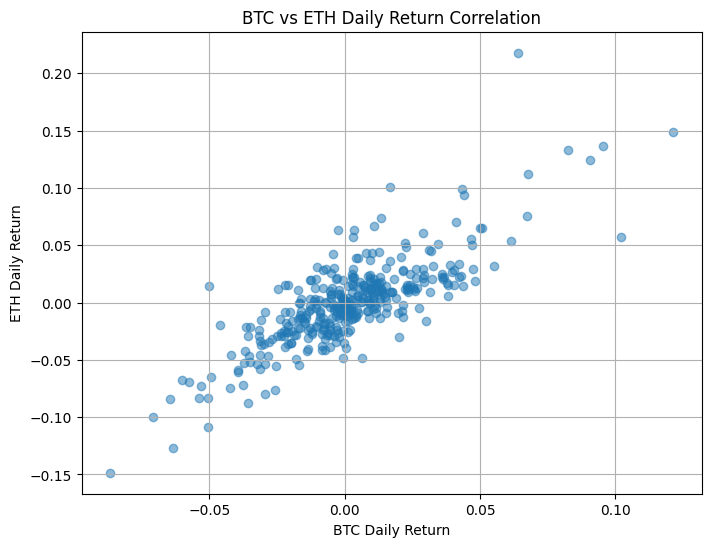

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Get 1 year of price data
data = yf.download(['BTC-USD', 'ETH-USD'], start='2024-05-21', end='2025-05-21')
returns = data['Close'].pct_change().dropna()

# Step 2: Calculate correlation
correlation = returns.corr()
print("📊 Correlation Matrix:")
print(correlation)

# Step 3: Plot BTC vs ETH daily returns
plt.figure(figsize=(8, 6))
plt.scatter(returns['BTC-USD'], returns['ETH-USD'], alpha=0.5)
plt.title('BTC vs ETH Daily Return Correlation')
plt.xlabel('BTC Daily Return')
plt.ylabel('ETH Daily Return')
plt.grid(True)
plt.show()


[*********************100%***********************]  2 of 2 completed



📊 Signal Summary:
long_ETH_short_BTC    28
short_ETH_long_BTC    25
no_trade              87
dtype: int64


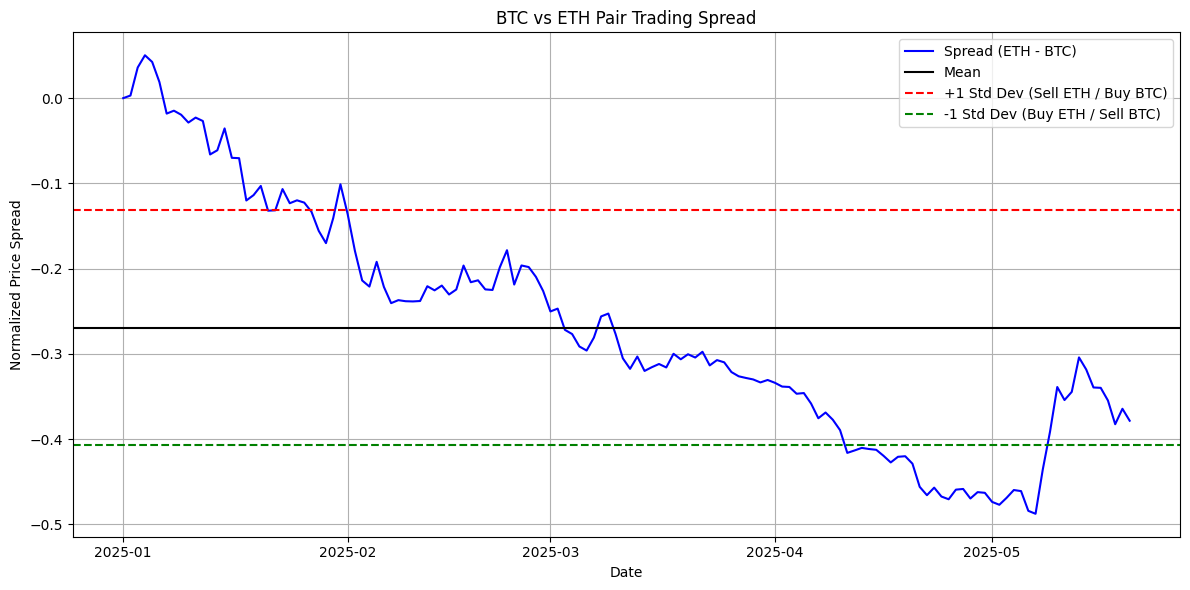

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Get BTC and ETH price data
data = yf.download(['BTC-USD', 'ETH-USD'], start='2025-01-01', end='2025-05-21')
close = data['Close']
norm = close / close.iloc[0]  # Normalize prices

# Step 2: Calculate spread
spread = norm['ETH-USD'] - norm['BTC-USD']
spread_mean = spread.mean()
spread_std = spread.std()
upper = spread_mean + spread_std
lower = spread_mean - spread_std

# Step 3: Generate trading signals
signals = pd.DataFrame(index=spread.index)
signals['long_ETH_short_BTC'] = spread < lower
signals['short_ETH_long_BTC'] = spread > upper
signals['no_trade'] = (spread >= lower) & (spread <= upper)

# Step 4: Count signal days
print("\n📊 Signal Summary:")
print(signals.sum())

# Step 5: Plot spread and signals
plt.figure(figsize=(12, 6))
plt.plot(spread, label='Spread (ETH - BTC)', color='blue')
plt.axhline(spread_mean, color='black', linestyle='-', label='Mean')
plt.axhline(upper, color='red', linestyle='--', label='+1 Std Dev (Sell ETH / Buy BTC)')
plt.axhline(lower, color='green', linestyle='--', label='-1 Std Dev (Buy ETH / Sell BTC)')
plt.title('BTC vs ETH Pair Trading Spread')
plt.xlabel('Date')
plt.ylabel('Normalized Price Spread')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
